In [1]:
from mumax_helper import *
import matplotlib.pyplot as plt 
import numpy as np 

In [42]:
# NUMERICAL PARAMETERS RELEVANT FOR THE SPECTRUM ANALYSIS
fmax = 5e9        # maximum frequency (in Hz) of the sinc pulse
T = 50e-9        # simulation time (longer -> better frequency resolution)
dt = 1/(2*fmax)  # the sample time (Nyquist theorem taken into account)
side_length = 300e-9  # diameter of the circle domain
fLow = 1.98e9
fHigh = 3.11e9


# Note that this is a format string, this means that the statements inside the
# curly brackets get evaluated by python. In this way, we insert the values of
# the variables above in the script.

def resonance_script(field, freq):

    script = f"""
        N := 256
        c := 2e-9
        d := 40e-9
        setgridsize(N, N, 1)
        setcellsize(c, c, d)

        setGeom(circle(N*c))

        // define grains with region number 0-255
        grainSize  := 100e-9  // m
        randomSeed := 1234567
        maxRegion  := 255
        ext_makegrains(grainSize, maxRegion, randomSeed)

        defregion(256, circle(N*c).inverse()) // region 256 is outside, not really needed

        K := 1e6
        Msat = 1e6
        Aex = 10e-12
        Dind = 2.2e-3
        Ku1 = K
        AnisU = vector(0,0,1)
        alpha = 0.001
        m = NeelSkyrmion(1,-1)

        // set random parameters per region
        for i:=0; i<maxRegion; i++{{
            // random 10% anisotropy variation
            Ku1.SetRegion(i, K + randNorm() * 0.1 * K)
            //m.SetRegion(i, NeelSkyrmion(1,-1))
            m.SetRegion(i, NeelSkyrmion(1,-1))

        }}

        m.SetRegion(50,NeelSkyrmion(1,-1))

        B_ext = vector(0,0,{field}*sin({freq}*2*pi*t))

        minimize()
        save(regions)
        save(Kc1)
        save(m)
        run({T})
    """

    return script


table2, fields2 = run_mumax3(resonance_script(.001, fmax),
                             "Lattice Rotation")


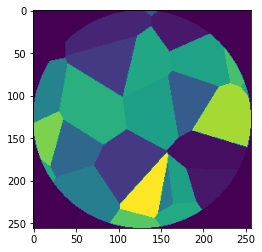

In [23]:
region = np.load(r"C:\Users\foile\OneDrive - University of Illinois - Urbana\Research\Calculations\Lattice Rotation.out\regions000000.npy")
plt.imshow(region[0,0])